# Real Estate Investing Analysis

To Do's at some point:
- update Docker image with Selenium
- find Google Chrome path location (or firefox path location) to use Selenium

### Explore:

- best markets for Airbnb
    - this would be median income over median sale price or avg income over avg sale price
- Austin specifically
    - 3/2 better than 2/1?
    - certain areas better than others?

Steps:
1. Importing
2. Cleaning
3. EDA
4. Visualizations
5. Conclusions

----

**TOOLS I WANT TO USE:**
- APIs
- Spark
- Docker
- Matplotlib
- AWS
- Frequentist and Bayesian Hypothesis Testing
- Pandas
- SQL
- GitHub and different branches and merging (nbstripout)

**STRETCHES:**
- maximum likelihood estimation to find a distribution
- Central Limit Theorem and bootstrapping to estimate means 
- Cloropleth map

**WHO IS YOUR AUDIENCE?**
COME UP WITH A PERSONA - WHAT DO THEY WANT TO KNOW AND WHY?
WHAT'S THE POINT OF THIS?

**NOTES:**
- readme file as you go
- interesting data that can keep you busy
- helper functions from the start

TECHNICAL SKILLS:
-EDA
- Visualization
- Hypothesis Testing
- Web Scraping/APIS

PRESENTATION SKILLS:
- Communicating technical findings
- Creating effective presentation

----

## Importing

In [2]:
%run src/imports.py

#### About the data

weekly_housing_market_data_most_recent.tsv 
- shows a bunch of information about the housing market
- useful columns - median sale price, region, region_id, median pending sqft, region name, region type

listings.csv
- useful columns - name, neighborhood, latitude, longitude, price, availability, room type

**listings2.csv**

**- can use this to scrape guests, bedrooms, beds, baths data**
- the only thing I would want from here is ID and listing_url

reviews.csv
- worthless

calendar.csv
- probably worthless

neighborhoods.csv
- probably worthless

In [13]:
REdf = pd.read_csv('data/REcleaned.csv')

In [8]:
listingsdf = pd.read_csv('data/listings.csv')

In [14]:
import gzip
import shutil
with gzip.open('data/calendar.csv.gz', 'rb') as f_in:
    with open('data/calendar.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [24]:
import gzip
import shutil
with gzip.open('data/listings.csv.gz', 'rb') as f_in:
    with open('data/listings2.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [25]:
listingsdf2 = pd.read_csv('data/listings2.csv')

In [32]:
listingsdf2.listing_url[0]

'https://www.airbnb.com/rooms/2265'

In [9]:
listingsdf.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,179,7,24,2019-03-16,0.17,3,129
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,536,2020-10-11,3.79,1,360
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,20,2012-05-24,0.14,2,85
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,257,2019-11-03,2.00,1,78


In [10]:
listingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10305 non-null  int64  
 1   name                            10305 non-null  object 
 2   host_id                         10305 non-null  int64  
 3   host_name                       10302 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10305 non-null  int64  
 6   latitude                        10305 non-null  float64
 7   longitude                       10305 non-null  float64
 8   room_type                       10305 non-null  object 
 9   price                           10305 non-null  int64  
 10  minimum_nights                  10305 non-null  int64  
 11  number_of_reviews               10305 non-null  int64  
 12  last_review                     

In [21]:
REdf[REdf['region_type'] == 'metro']['region_name'].unique()

array(['Dayton, OH metro area', 'San Francisco, CA metro area',
       'New Haven, CT metro area', 'Tampa, FL metro area',
       'Sevierville, TN metro area', 'Boulder, CO metro area',
       'Ottawa, IL metro area', 'Fernley, NV metro area',
       'Clewiston, FL metro area', 'Seattle, WA metro area',
       'Memphis, TN metro area', 'Philadelphia, PA metro area',
       'Provo, UT metro area', 'Flint, MI metro area',
       'Montgomery County, PA metro area', 'Ludington, MI metro area',
       'Norwich, CT metro area', 'Ashtabula, OH metro area',
       'Birmingham, AL metro area', 'Fallon, NV metro area',
       'Gettysburg, PA metro area', 'Modesto, CA metro area',
       'Austin, MN metro area', 'Madison, WI metro area',
       'Augusta, ME metro area', 'Worcester, MA metro area',
       'El Paso, TX metro area', 'Olympia, WA metro area',
       'Lincoln, NE metro area', 'Frederick, MD metro area',
       'Shawnee, OK metro area', 'Niles, MI metro area',
       'Eau Claire, WI me

In [28]:
Nsale = REdf[REdf['region_name'] == 'Nashville, TN metro area']

In [50]:
Nppsf = Nsale['median_sale_ppsf'].median()

In [51]:
N_median_sale = Nsale['median_sale_price'].median()

In [22]:
ATXsale = REdf[REdf['region_name'] == 'Austin, TX metro area']

In [59]:
ATXppsf = ATXsale['median_sale_ppsf'].median()

In [54]:
ATX_median_sale = ATXsale['median_sale_price'].median()

In [23]:
Bsale = REdf[REdf['region_name'] == 'Boston, MA metro area']

In [60]:
Bppsf = Bsale['median_sale_ppsf'].median()

In [56]:
B_median_sale = Bsale['median_sale_price'].median()

In [15]:
SFsale = REdf[REdf['region_name'] == 'San Francisco, CA metro area']

In [61]:
SFppsf = SFsale['median_sale_ppsf'].median()

In [57]:
SF_median_sale = SFsale['median_sale_price'].median()

In [62]:
xlabels = ['Austin','Nashville','San Francisco','Boston']

In [63]:
yppsf = [ATXppsf,Nppsf,SFppsf,Bppsf]

In [64]:
ysale = [ATX_median_sale,N_median_sale,SF_median_sale,B_median_sale]

## Cleaning

## EDA

In [36]:
Austin_df = pd.read_pickle('data/Austin/city_listings_combAustin.pkl')

In [46]:
ATXnumber = len(Austin_df)
ATX_median_nightly = Austin_df['price'].median()

In [37]:
Nashville_df = pd.read_pickle('data/Nashville/city_listings_combNashville.pkl')

In [47]:
Nnumber = len(Nashville_df)
N_median_nightly = Nashville_df['price'].median()

In [38]:
Boston_df = pd.read_pickle('data/Boston/city_listings_combBoston.pkl')

In [48]:
Bnumber = len(Boston_df)
B_median_nightly = Boston_df['price'].median()

In [39]:
SF_df = pd.read_pickle('data/San Francisco/city_listings_combSan Francisco.pkl')

In [49]:
SFnumber = len(SF_df)
SF_median_nightly = SF_df['price'].median()

In [65]:
ynumber = [ATXnumber,Nnumber,SFnumber,Bnumber]

In [66]:
ynightly = [ATX_median_nightly,N_median_nightly,SF_median_nightly,B_median_nightly]

Making dataframe

In [117]:
basic_data = [yppsf,ysale,ynumber,ynightly]

In [118]:
basic_df = pd.DataFrame(basic_data,columns=xlabels)

In [120]:
basic_df['index'] = ['ppsf','sale_price','number_of_rentals','nightly_price']

In [123]:
basic_df.set_index('index',inplace=True)

In [125]:
basic_df.to_csv('data/basicinfo.csv')

## Visualizations

In [110]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [113]:
plt.style.use('ggplot')

<ipython-input-116-52b52580c0aa>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(xlabels,rotation=90)
<ipython-input-116-52b52580c0aa>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(xlabels,rotation=90)
<ipython-input-116-52b52580c0aa>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(xlabels,rotation=90)
<ipython-input-116-52b52580c0aa>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(xlabels,rotation=90)


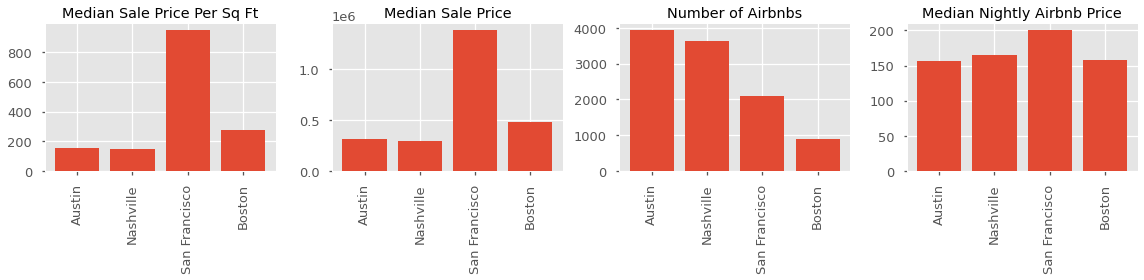

In [116]:
fig,ax = plt.subplots(1,4,figsize=(16,4))

ax[0].bar(xlabels,yppsf)
ax[0].set_xticklabels(xlabels,rotation=90)
ax[0].set_title('Median Sale Price Per Sq Ft')
ax[1].bar(xlabels,ysale)
ax[1].set_xticklabels(xlabels,rotation=90)
ax[1].set_title('Median Sale Price')
ax[2].bar(xlabels,ynumber)
ax[2].set_xticklabels(xlabels,rotation=90)
ax[2].set_title('Number of Airbnbs')
ax[3].bar(xlabels,ynightly)
ax[3].set_xticklabels(xlabels,rotation=90)
ax[3].set_title('Median Nightly Airbnb Price');
plt.tight_layout()
plt.savefig('img/cities.png')

## Conclusions